<a href="https://colab.research.google.com/github/Swamidalhat/Hello-/blob/main/bread_basket_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import transactionencoder 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
#reading csv file
df=pd.read_csv("bread basket.csv")

In [ ]:
df.isna().sum()#checking null value count


Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [ ]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [ ]:
df[df['Item']=='None'].shape

(0, 5)

In [ ]:
df['period_day'].value_counts()

afternoon    11569
morning       8404
evening        520
night           14
Name: period_day, dtype: int64

In [ ]:

le=LabelEncoder()
df['period_day']=le.fit_transform(df['period_day'])
df['period_day'].value_counts()

0    11569
2     8404
1      520
3       14
Name: period_day, dtype: int64

In [ ]:
most_sold=df['Item'].value_counts().head(8)
most_sold

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Name: Item, dtype: int64

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
df['Item']=df['Item'].str.strip()
df["date_time"]=df["date_time"].astype('str')

In [ ]:
df["date_time"]

0        30-10-2016 09:58
1        30-10-2016 10:05
2        30-10-2016 10:05
3        30-10-2016 10:07
4        30-10-2016 10:07
               ...       
20502    09-04-2017 14:32
20503    09-04-2017 14:32
20504    09-04-2017 14:57
20505    09-04-2017 14:57
20506    09-04-2017 15:04
Name: date_time, Length: 20507, dtype: object

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,2,weekend
1,2,Scandinavian,30-10-2016 10:05,2,weekend
2,2,Scandinavian,30-10-2016 10:05,2,weekend
3,3,Hot chocolate,30-10-2016 10:07,2,weekend
4,3,Jam,30-10-2016 10:07,2,weekend


In [ ]:
df['period_day'].value_counts()

0    11569
2     8404
1      520
3       14
Name: period_day, dtype: int64

In [ ]:
df["weekday_weekend"].value_counts()

weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

Text(0.5, 1.0, 'Items most sold')

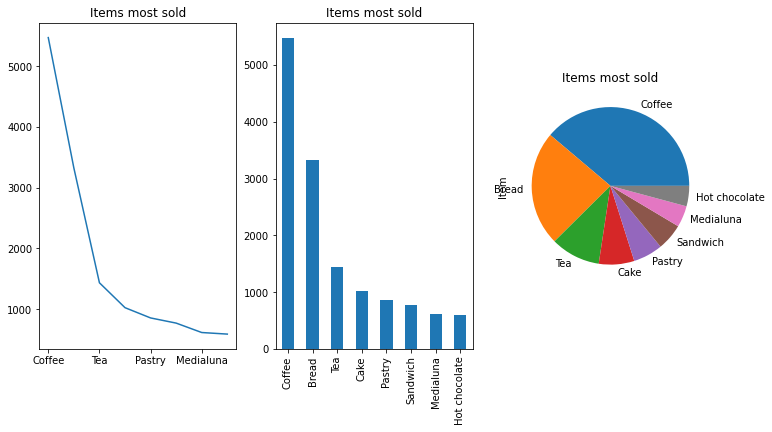

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
most_sold.plot(kind='line')
plt.title('Items most sold')

plt.subplot(1,3,2)
most_sold.plot(kind='bar')
plt.title('Items most sold')

plt.subplot(1,3,3)
most_sold.plot(kind='pie')
plt.title('Items most sold')


In [ ]:
transaction_list=[]
for i in df['Transaction'].unique():
  tlist=list(set(df[df['Transaction']==i]['Item']))
  if len(tlist)>0:
    transaction_list.append(tlist)
print(len(transaction_list))

9465


In [ ]:
transaction_list

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry'],
 ['Pastry', 'Muffin', 'Medialuna'],
 ['Tea', 'Pastry', 'Medialuna', 'Coffee'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna'],
 ['Tea', 'Coffee', 'Tartine', 'Pastry', 'Jam'],
 ['Bread', 'Coffee', 'Basket'],
 ['Bread', 'Pastry', 'Medialuna'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Coffee', 'Medialuna'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Bread', 'Farm House'],
 ['Bread', 'Medialuna'],
 ['Bread', 'Coffee', 'Medialuna'],
 ['Jam'],
 ['Muffin', 'Scandinavian'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Bread', 'Coffee'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Muffin', 'Scandinavian'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Bread', 'Coffee'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Muffin', 'Tartine', 'Coffee'],
 ['Scandinavia

In [ ]:
from mlxtend.preprocessing import TransactionEncoder 
te=TransactionEncoder()
te_ary=te.fit(transaction_list).transform(transaction_list)
df2=pd.DataFrame(te_ary,columns=te.columns_)
df2.head(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fals

In [ ]:
df2.shape

(9465, 94)

In [ ]:
frequent_itemsets=apriori(df2, min_support=0.01, use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [ ]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [ ]:
rules.drop(columns=['antecedent support','consequent support','lift','leverage','conviction'])

,antecedents,consequents,support,confidence
0,(Alfajores),(Coffee),0.019651,0.540698
1,(Coffee),(Alfajores),0.019651,0.041078
2,(Bread),(Pastry),0.029160,0.089119
3,(Pastry),(Bread),0.029160,0.338650
4,(Brownie),(Coffee),0.019651,0.490765
5,(Coffee),(Brownie),0.019651,0.041078
6,(Coffee),(Cake),0.054728,0.114399
7,(Cake),(Coffee),0.054728,0.526958
8,(Cake),(Hot chocolate),0.011410,0.109868
9,(Hot chocolate),(Cake),0.011410,0.195652


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.036344,(Alfajores),1
1,0.016059,(Baguette),1
2,0.327205,(Bread),1
3,0.040042,(Brownie),1
4,0.103856,(Cake),1
...,...,...,...
56,0.023666,"(Toast, Coffee)",2
57,0.014369,"(Tea, Sandwich)",2
58,0.010037,"(Bread, Coffee, Cake)",3
59,0.011199,"(Bread, Coffee, Pastry)",3


In [ ]:
frequent_itemsets[(frequent_itemsets['length']==2)&
                  (frequent_itemsets['support']>=0.01)]

,support,itemsets,length
30,0.010354,"(Alfajores, Bread)",2
31,0.019651,"(Alfajores, Coffee)",2
32,0.010777,"(Bread, Brownie)",2
33,0.023349,"(Bread, Cake)",2
34,0.090016,"(Bread, Coffee)",2
35,0.014474,"(Bread, Cookies)",2
36,0.013418,"(Bread, Hot chocolate)",2
37,0.016904,"(Bread, Medialuna)",2
38,0.029160,"(Bread, Pastry)",2
39,0.017010,"(Bread, Sandwich)",2


In [ ]:
frequent_itemsets[(frequent_itemsets['length']==3)&
                  (frequent_itemsets['support']>=0.01)]

,support,itemsets,length
58,0.010037,"(Bread, Coffee, Cake)",3
59,0.011199,"(Bread, Coffee, Pastry)",3
60,0.010037,"(Tea, Coffee, Cake)",3


In [ ]:
rules[(rules['support']>=0.03)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
18,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384


In [ ]:
rules[(rules['confidence']>=0.50)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
15,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
